In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression  

In [ ]:
file_Path = '/content/Earthquakes_earthquakes.csv'

In [ ]:
data = pd.read_csv(file_Path)

In [ ]:
data.head()

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
0,usp000gyu4,39.644,-75.483,5000,NEIC,md,2.8,New Jersey,2009-07-01T13:44:43.380Z,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,NEIC,mblg,2.8,West Virginia,2009-07-04T12:24:43.460Z,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,NEIC,md,2.1,"southern Quebec, Canada",2009-07-08T10:22:11.430Z,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,NEIC,md,2.4,New York,2009-09-23T03:45:59.900Z,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,NEIC,mblg,3.4,West Virginia,2010-04-04T09:19:14.000Z,2010/04/04 05:19:14-04,0,0


In [ ]:
#normalize data
data['_Contributor_'] = data['_Contributor_'].map({'NEIC': 1, 'ANF': 0})

In [ ]:
data['_MagType_'] = data['_MagType_'].map({'md':0, 'mblg':1, 'ml':2, 'Ml':3, 'ML':4, 'mb':5, 'MbLg':6, 'Md':7, 'lg':8,
       'mwc':9, 'mwr':10, 'Mw':11})

In [ ]:
#fill NA data 
data = data.fillna(method='ffill')

In [ ]:
data.head()

,_EventID_,_Latitude_,_Longitude_,_DepthMeters_,_Contributor_,_MagType_,_Magnitude_,_EventLocationName_,_Time_,ts,potential_blast,bix_potential_blasts
0,usp000gyu4,39.644,-75.483,5000,1,0.0,2.8,New Jersey,2009-07-01T13:44:43.380Z,2009/07/01 09:44:43-04,0,0
1,usp000gyxs,37.379,-80.746,11500,1,1.0,2.8,West Virginia,2009-07-04T12:24:43.460Z,2009/07/04 08:24:43-04,0,0
2,usp000gz1d,45.296,-73.475,18000,1,0.0,2.1,"southern Quebec, Canada",2009-07-08T10:22:11.430Z,2009/07/08 06:22:11-04,0,0
3,usp000h1sz,42.825,-78.239,5000,1,0.0,2.4,New York,2009-09-23T03:45:59.900Z,2009/09/22 23:45:59-04,0,0
4,usp000hab0,38.619,-80.909,100,1,1.0,3.4,West Virginia,2010-04-04T09:19:14.000Z,2010/04/04 05:19:14-04,0,0


# **Find Correlations with Heat map**

In [ ]:
#Select numerical data 
NumColumns = ['_Latitude_',
 '_Longitude_',
 '_DepthMeters_',
 '_Magnitude_',
 'potential_blast',
 'bix_potential_blasts',
 '_Contributor_',
 '_MagType_']

In [ ]:
NumColumns

['_Latitude_',
 '_Longitude_',
 '_DepthMeters_',
 '_Magnitude_',
 'potential_blast',
 'bix_potential_blasts',
 '_Contributor_',
 '_MagType_']

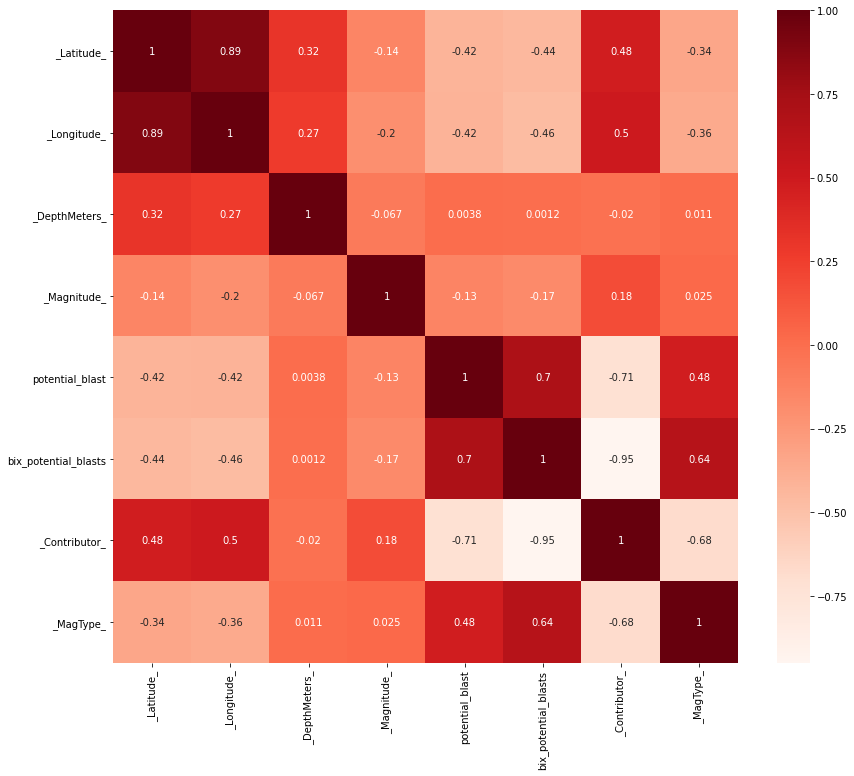

In [ ]:
#find correlations using heat maps
corr_map = data[NumColumns].corr() 
plt.figure(figsize=(14,12))
sns.heatmap(corr_map, annot=True, cmap="Reds")
plt.show()

# **Find Correlations Between Lat. and Long.**

In [ ]:
#declare X
X = data[['_Latitude_']]

In [ ]:
#declare y
y = data[['_Longitude_']]

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
#fit data
linreg = linear_model.LinearRegression()
linreg.fit(X_train , y_train)

y_pred = linreg.predict(X_test)
y_pred.shape

(544, 1)

In [ ]:
#check metrics 
print('R-Squared :', metrics.r2_score(y_test,y_pred).round(2))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_pred))
print('R Mean Square Error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R-Squared : 0.81
Mean Squared Error : 1.9431519139893647
R Mean Square Error : 1.3939698396986087


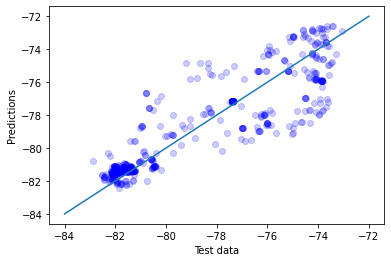

In [ ]:
#print model and line 
plt.scatter(y_test, y_pred, alpha=0.2, color = 'blue')

plt.xlabel('Test data')
plt.ylabel('Predictions')
i=0
s=1
x=np.linspace(-84,-72,100)
plt.plot(x, s*x + i)
plt.show()

# **Is Magnatude related to all other numeric factors?**

In [ ]:
#declare X
X = data[['_Latitude_',
 '_Longitude_',
 '_DepthMeters_',
 'potential_blast',
 'bix_potential_blasts',
 '_Contributor_',
 '_MagType_']]

In [ ]:
#declare target
y = data[['_Magnitude_']]

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
#linear regression model
linreg = linear_model.LinearRegression()
linreg.fit(X_train , y_train)
mag_y_pred = linreg.predict(X_test)
mag_y_pred.shape

(544, 1)

In [ ]:
#check metrics 
print('R-Squared :', metrics.r2_score(y_test,mag_y_pred).round(2))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_pred))
print('R Mean Square Error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R-Squared : 0.11
Mean Squared Error : 6624.825677465807
R Mean Square Error : 81.39303211863904


Text(0, 0.5, 'Predictions')

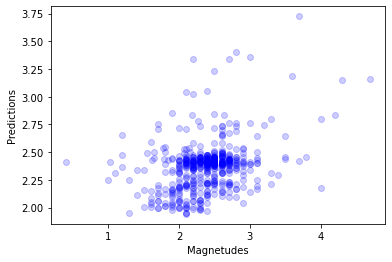

In [ ]:
#scatter plot
plt.scatter(y_test, mag_y_pred,  alpha=0.2, color = 'blue')
plt.xlabel('Magnetudes')
plt.ylabel('Predictions')

# **Feature** **Importance**

In [ ]:
#scale data
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(X_train)

In [ ]:
#regression model 
rfe = RFE(linreg)
rfe.fit(scaled_x_train, y_train.values.ravel())

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [ ]:
#train data
x_train_rfe = X_train[X_train.columns]

In [ ]:
X_train

,_Latitude_,_Longitude_,_DepthMeters_,potential_blast,bix_potential_blasts,_Contributor_,_MagType_
305,38.0676,-81.7150,1000,1,1,0,4.0
1186,37.8444,-81.8971,15200,1,1,0,4.0
3,42.8250,-78.2390,5000,0,0,1,0.0
1160,37.7347,-82.0135,2700,1,1,0,4.0
1274,37.7582,-82.0482,3800,1,1,0,4.0
...,...,...,...,...,...,...,...
1393,43.0300,-78.5710,6000,0,0,1,0.0
1344,37.7617,-82.1772,3700,1,1,0,4.0
527,38.0545,-81.6817,13300,1,1,0,4.0
1149,37.7738,-81.8155,6300,1,1,0,4.0


In [ ]:
x_test_rfe = X_test[X_test.columns[rfe.support_]]

In [ ]:
#random forest regressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50)
rf.fit(x_train_rfe,y_train.values.ravel());

In [ ]:
#feature impotance
rf.feature_importances_

array([0.25036993, 0.2707951 , 0.14617413, 0.01326731, 0.00927615,
       0.01722795, 0.29288943])

In [ ]:
#Feature importance list
feature_importances = pd.DataFrame(rf.feature_importances_, index = x_train_rfe.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
_MagType_,0.292889
_Longitude_,0.270795
_Latitude_,0.250370
_DepthMeters_,0.146174
_Contributor_,0.017228
potential_blast,0.013267
bix_potential_blasts,0.009276


Text(0.5, 0, 'Relative Importance')

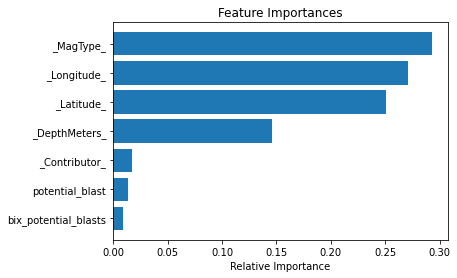

In [ ]:
#feature importance bar graph
features=x_train_rfe.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Use only important features for new model

In [ ]:
#declare X
X = data[['_Latitude_',
 '_Longitude_',
 '_MagType_',
 '_DepthMeters_']]

In [ ]:
#declare target 
y = data[['_Magnitude_']]

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
#linear regression
linreg = linear_model.LinearRegression()
linreg.fit(X_train , y_train)

mag_y_pred = linreg.predict(X_test)
mag_y_pred.shape

(544, 1)

In [ ]:
#Metrics
print('R-Squared :', metrics.r2_score(y_test,mag_y_pred).round(2))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_pred))
print('R Mean Square Error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R-Squared : 0.06
Mean Squared Error : 6624.825677465807
R Mean Square Error : 81.39303211863904


Text(0, 0.5, 'Predictions')

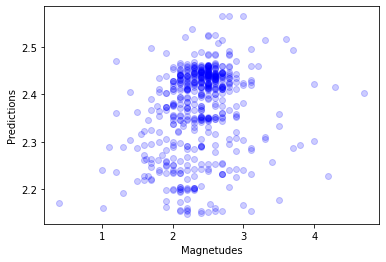

In [ ]:
#new scatter plot
plt.scatter(y_test, mag_y_pred,  alpha=0.2, color = 'blue')
plt.xlabel('Magnetudes')
plt.ylabel('Predictions')